# FIRST EXERCISE

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Loading full dataset and inspecting it:

In [2]:
full_dataset = pd.read_csv('Frogs_MFCCs.csv')
full_dataset.shape

(7195, 26)

In [3]:
full_dataset.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


N.B. Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC, which represent the short-term power spectrum of a sound. Then the features are homogeneous, i.e. measured in the same units, and already normalized in $[-1,1]$

In [4]:
print("Are there missing data? " + str(full_dataset.isna().any().any()))

Are there missing data? False


Only keeping numerical entries:

In [5]:
data = np.array(full_dataset.iloc[:,:22])
data.shape

(7195, 22)

Dataset $X_\alpha^i$ has $i=1,...,7195$ and $\alpha = 1,...,22$ ($N=7195\,,D=22$). 
Let's apply the PCA pipeline:
## 1) Preprocessing (normalization and centering)
Data are cenetered and divided by their standard deviation for each dimension $\alpha$:

In [6]:
data_ns = data - np.mean(data,axis=0)
data = data_ns / np.std(data,axis=0)

Check that data are now properly centered and normalized:

In [7]:
with np.printoptions(precision=1):
    print("Feature averages after centering:\n\t" + str(np.mean(data,axis=0)))
    print("\nFeature standard deviations after normalization:\n\t" + str(np.std(data,axis=0)))

Feature averages after centering:
	[-3.5e-16  1.6e-16 -3.2e-17 -3.3e-16 -9.5e-17 -6.3e-17 -1.6e-17  6.3e-17
 -7.9e-17  4.0e-17  6.3e-17  0.0e+00  3.2e-17  1.6e-17  1.6e-17 -1.6e-17
  9.5e-17  4.7e-17  0.0e+00  3.2e-17  4.7e-17  6.3e-17]

Feature standard deviations after normalization:
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 2) Principal Component Analysis
We want to compute the Principal Components (PCs)
\begin{equation}
    \widetilde{Y}_k^i=\sum_\alpha A_{k\alpha}X_\alpha^i\,,
\end{equation}
where $k=1,...,d$ and $A_{k\alpha}$ is the $\alpha$ component of the $k$-th eigenvector of the covariance matrix $C$ defined below:
\begin{equation}
    \mathbf{C}\,\mathbf{A}_k = \lambda_k \mathbf{A}_k\,.
\end{equation}
### 2.1) Covariance matrix C
$A_{k\alpha}$ are the normalized eigenvectors of the covariance matrix $\mathbf{C}$:
\begin{equation}
    C_{\alpha\beta} = \frac{1}{N}\sum_{i}X_\alpha^i X_\beta^i = \frac{1}{7195}\sum_{i=1}^{7195} X_\alpha^i X_\beta^i\,,
\end{equation}
which has dimensions $D\times D = 22\times 22$.

In [8]:
N = data.shape[0] # 7195
D = data.shape[1] # 22
covariance_X = np.zeros((D,D))
covariance_X_ns = np.zeros((D,D))
for D1 in range(D):
    for D2 in range(D):
        covariance_X[D1,D2] = np.sum(data[:,D1]*data[:,D2]) / N
        covariance_X_ns[D1,D2] = np.sum(data_ns[:,D1]*data_ns[:,D2]) / N

### 2.2) Eigenvalue problem for C

In [9]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_X) # optimized for symmetric real matrices
eigenvalues = np.flip(eigenvalues)  # by default in ascending order
eigenvectors = np.flip(eigenvectors,axis=1)

eigenvalues_ns, eigenvectors_ns = np.linalg.eigh(covariance_X_ns) 
eigenvalues_ns = np.flip(eigenvalues_ns)  
eigenvectors_ns = np.flip(eigenvectors_ns,axis=1)

Let's plot the eigenvalues of $\mathbf{C}$ together woith the quality factor $q_k$, defined as
\begin{equation}
   q_k = \frac{\sum_{l=1}^k\lambda_l}{\sum_{l=1}^D\lambda_l}\,.
\end{equation}
$q_k$ quantifies how much variance of the original features is represented by the first $k$ PCs.

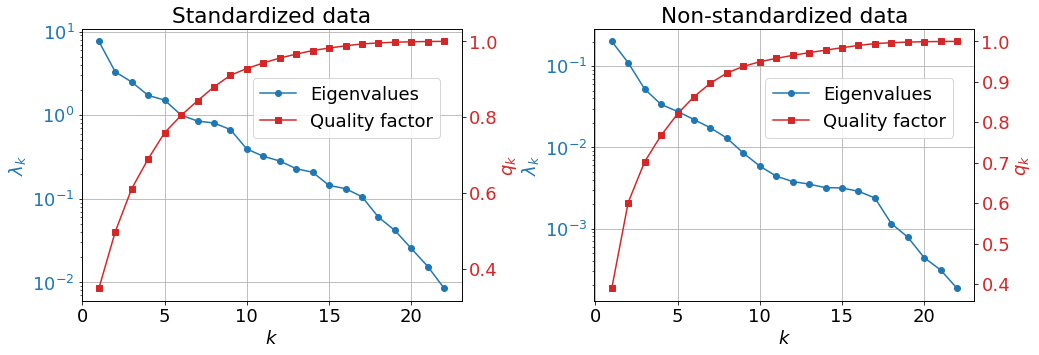

In [10]:
plt.rcParams['font.size'] = 18
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(16,5))

color = 'tab:blue'
lns1 = ax1.plot(np.arange(1,D+1),eigenvalues,'o-',color=color,label="Eigenvalues")
ax1.set(xlabel="$k$",title="Standardized data",yscale="log")
ax1.set_ylabel(ylabel="$\\lambda_k$",color=color)
ax1.grid("on")
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax2 = ax1.twinx()  
lns2 = ax2.plot(np.arange(1,D+1),np.cumsum(eigenvalues)/np.sum(eigenvalues),'s-',color=color,label="Quality factor")
ax2.set_ylabel("$q_k$",color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.legend()

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=[0.45,0.6])

color = 'tab:blue'
lns1 = ax3.plot(np.arange(1,D+1),eigenvalues_ns,'o-',color=color,label="Eigenvalues")
ax3.set(xlabel="$k$",title="Non-standardized data",yscale="log")
ax3.set_ylabel(ylabel="$\\lambda_k$",color=color)
ax3.grid("on")
ax3.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax4 = ax3.twinx()  
lns2 = ax4.plot(np.arange(1,D+1),np.cumsum(eigenvalues_ns)/np.sum(eigenvalues_ns),'s-',color=color,label="Quality factor")
ax4.set_ylabel("$q_k$",color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax3.legend()

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, loc=[0.45,0.6])
plt.subplots_adjust(wspace=0.35)
plt.show()

In [12]:
q2 = (eigenvalues[0] + eigenvalues[1]) / np.sum(eigenvalues)
q2_ns = (eigenvalues_ns[0] + eigenvalues_ns[1]) / np.sum(eigenvalues_ns)
print("q2    = " + "{:.5f}".format(q2))
print("q2_ns = " + "{:.5f}".format(q2_ns))

q2    = 0.49803
q2_ns = 0.60154


## 3) Project data in the two first PCs and color it by the FAMILY column
Let's perform a dimensional reduction with $d=2$, namely to the reduced variables
\begin{align}
    \widetilde{Y}_1^{\,i} &= \sum_\alpha A_{1\alpha}X_\alpha^i\,, \\
    \widetilde{Y}_2^{\,i} &= \sum_\alpha A_{2\alpha}X_\alpha^i\,.
\end{align}

Check that the eigenvectors are orthonormal:

In [13]:
print("Norms of the first two eigenvectors: {:.6f}\t{:.6f}".format(np.linalg.norm(eigenvectors[:,0]),np.linalg.norm(eigenvectors[:,1])))
print("Scalar product of the first two eigenvectors: {:.4g}".format(np.dot(eigenvectors[:,0],eigenvectors[:,1])))

Norms of the first two eigenvectors: 1.000000	1.000000
Scalar product of the first two eigenvectors: 2.082e-17


Then we compute the first two PCs of the data:

In [14]:
Y1 = np.zeros(N)
Y2 = np.zeros(N)
Y1_ns = np.zeros(N)
Y2_ns = np.zeros(N)
for i in range(N):
    Y1[i] = np.dot(eigenvectors[:,0],data[i,:])
    Y2[i] = np.dot(eigenvectors[:,1],data[i,:])
    Y1_ns[i] = np.dot(eigenvectors_ns[:,0],data_ns[i,:])
    Y2_ns[i] = np.dot(eigenvectors_ns[:,1],data_ns[i,:])

Plot of the first two PCs:

In [15]:
data_family = np.loadtxt("Frogs_MFCCs.csv",dtype=str,delimiter=',',skiprows=1,usecols=22)
families = []
families_indices = {}
for i in np.arange(N):
    family_name = data_family[i]
    if (family_name not in families): 
        families.append(family_name)
        families_indices[family_name] = []
    families_indices[family_name].append(i)
        
print("Distinct families: " + str(families))

Distinct families: ['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae']


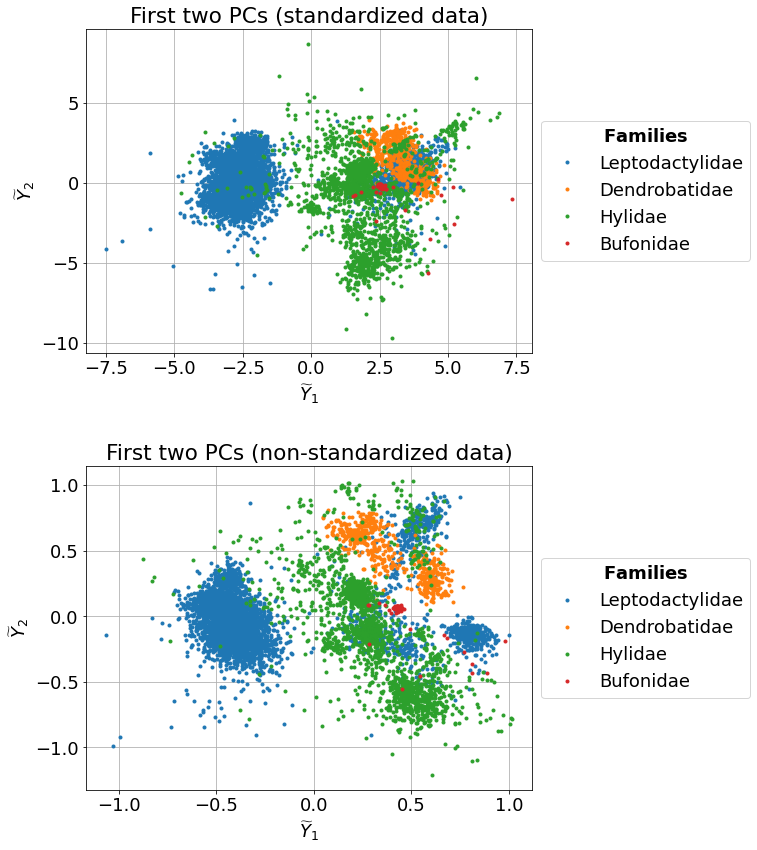

In [16]:
fig, ax = plt.subplots(2,1,figsize=(8,14))

for family_name in families:
    indices = families_indices[family_name]
    ax[0].plot(Y1[indices],Y2[indices],'.',label=family_name)
ax[0].set_xlabel("$\widetilde{Y}_1$")
ax[0].set_ylabel("$\widetilde{Y}_2$")
ax[0].grid("on")
ax[0].set_title("First two PCs (standardized data)")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5),title="$\mathbf{Families}$")

for family_name in families:
    indices = families_indices[family_name]
    ax[1].plot(Y1_ns[indices],Y2_ns[indices],'.',label=family_name)
ax[1].set_xlabel("$\widetilde{Y}_1$")
ax[1].set_ylabel("$\widetilde{Y}_2$")
ax[1].grid("on")
ax[1].set_title("First two PCs (non-standardized data)")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5),title="$\mathbf{Families}$")
plt.subplots_adjust(hspace=0.35)
plt.show()

### 3.1) Color by GENUS

In [17]:
data_genus = np.loadtxt("Frogs_MFCCs.csv",dtype=str,delimiter=',',skiprows=1,usecols=23)
genus = []
genus_indices = {}
for i in np.arange(N):
    genus_name = data_genus[i]
    if (genus_name not in genus): 
        genus.append(genus_name)
        genus_indices[genus_name] = []
    genus_indices[genus_name].append(i)
        
print("Distinct families: " + str(genus))

Distinct families: ['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas', 'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax']


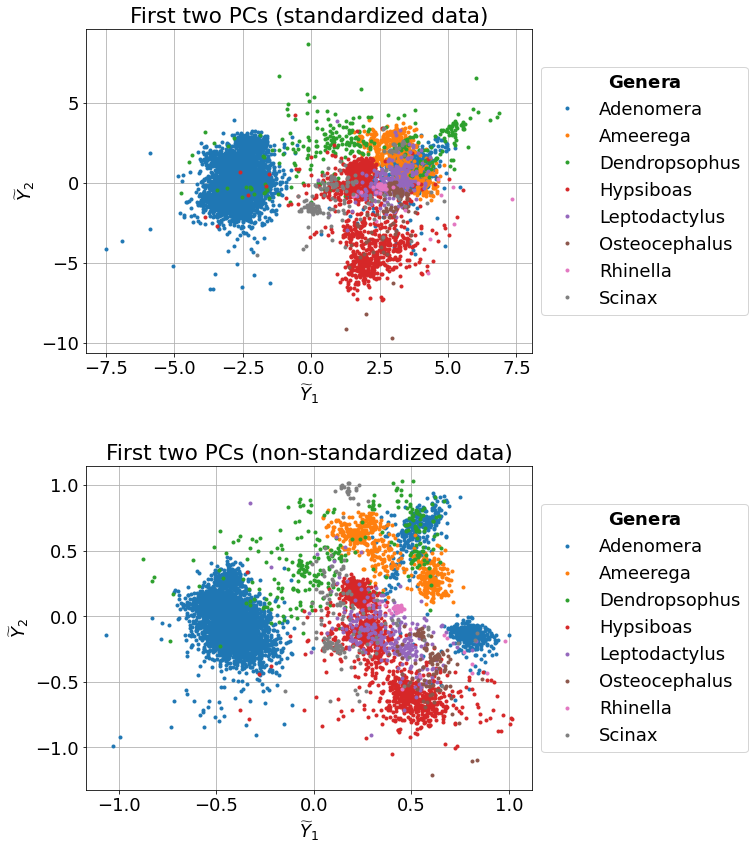

In [18]:
fig, ax = plt.subplots(2,1,figsize=(8,14))

for genus_name in genus:
    indices = genus_indices[genus_name]
    ax[0].plot(Y1[indices],Y2[indices],'.',label=genus_name)
ax[0].set_xlabel("$\widetilde{Y}_1$")
ax[0].set_ylabel("$\widetilde{Y}_2$")
ax[0].grid("on")
ax[0].set_title("First two PCs (standardized data)")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5),title="$\mathbf{Genera}$")

for genus_name in genus:
    indices = genus_indices[genus_name]
    ax[1].plot(Y1_ns[indices],Y2_ns[indices],'.',label=genus_name)
ax[1].set_xlabel("$\widetilde{Y}_1$")
ax[1].set_ylabel("$\widetilde{Y}_2$")
ax[1].grid("on")
ax[1].set_title("First two PCs (non-standardized data)")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5),title="$\mathbf{Genera}$")
plt.subplots_adjust(hspace=0.35)
plt.show()

### 3.2) Color by SPECIES

In [19]:
data_species = np.loadtxt("Frogs_MFCCs.csv",dtype=str,delimiter=',',skiprows=1,usecols=24)
species = []
species_indices = {}
for i in np.arange(N):
    species_name = data_species[i]
    if (species_name not in species): 
        species.append(species_name)
        species_indices[species_name] = []
    species_indices[species_name].append(i)
        
print("Distinct families: " + str(species))

Distinct families: ['AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber']


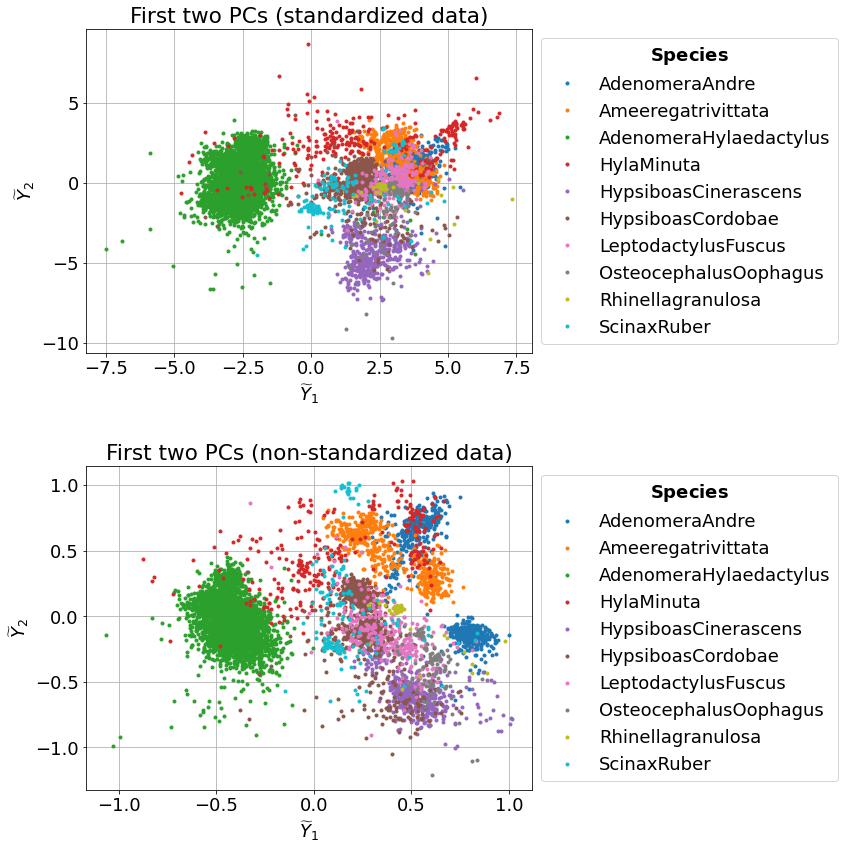

In [20]:
fig, ax = plt.subplots(2,1,figsize=(8,14))

for species_name in species:
    indices = species_indices[species_name]
    ax[0].plot(Y1[indices],Y2[indices],'.',label=species_name)
ax[0].set_xlabel("$\widetilde{Y}_1$")
ax[0].set_ylabel("$\widetilde{Y}_2$")
ax[0].grid("on")
ax[0].set_title("First two PCs (standardized data)")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5),title="$\mathbf{Species}$")

for species_name in species:
    indices = species_indices[species_name]
    ax[1].plot(Y1_ns[indices],Y2_ns[indices],'.',label=species_name)
ax[1].set_xlabel("$\widetilde{Y}_1$")
ax[1].set_ylabel("$\widetilde{Y}_2$")
ax[1].grid("on")
ax[1].set_title("First two PCs (non-standardized data)")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5),title="$\mathbf{Species}$")
plt.subplots_adjust(hspace=0.35)
plt.show()